<a href="https://colab.research.google.com/github/erlonL/testes-inferencia/blob/main/Zscore.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Testes de Hipótese para Média Populacional

X: média amostral

n: número de valores da amostra

alpha: nivel de significância

sigma: desvio padrão

mu: média populacional

H0: a amostra provém de uma população com determinada média (mu = mu0)

H1: contesta a hipótese nula (mu != mu0)

### Bibliotecas e funções básicas

In [1]:
import pandas as pd
import numpy as np
import math
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import random

In [2]:
def generate_normal_random_values(count, min_val, max_val):
    mn = (max_val - min_val) / 2

    X = np.random.normal(loc=mn, scale=mn/3, size=count)
    X = np.clip(X, min_val, max_val)

    return X

In [14]:
def treat_values(values):
    values = [round(x, ndigits=1) for x in values]
    values = np.array(values)
    return values

In [5]:
def statistics(values):
    # Informações importantes sobre o conjunto de valores

    media = np.mean(values)
    var = np.var(values)
    dp = np.std(values)
    cont = len(values)

    return media, var, dp, cont

## Teste Z de Hipótese p/ Média Populacional

In [6]:
def Zscore(X, n, alpha, mu0, sigma, teste):
  Z = (X - mu0) / (sigma/(n)**(1/2))

  if teste == 'UNILATERAL':

    ppf = stats.norm.ppf(alpha)

    if Z < ppf:
      #print("Com 95% de confiança, temos provas para rejeitar H0.")
      return False
    else:
      #print("Com 95% de confiança, não temos provas para rejeitar H0")
      return True

  elif teste == 'BILATERAL':
    ppf = stats.norm.ppf(alpha/2)

    if Z < ppf or Z > -ppf:
      #print("Com 95% de confiança, temos provas para rejeitar H0.")
      return False
    else:
      #print("Com 95% de confiança, não temos provas para rejeitar H0")
      return True

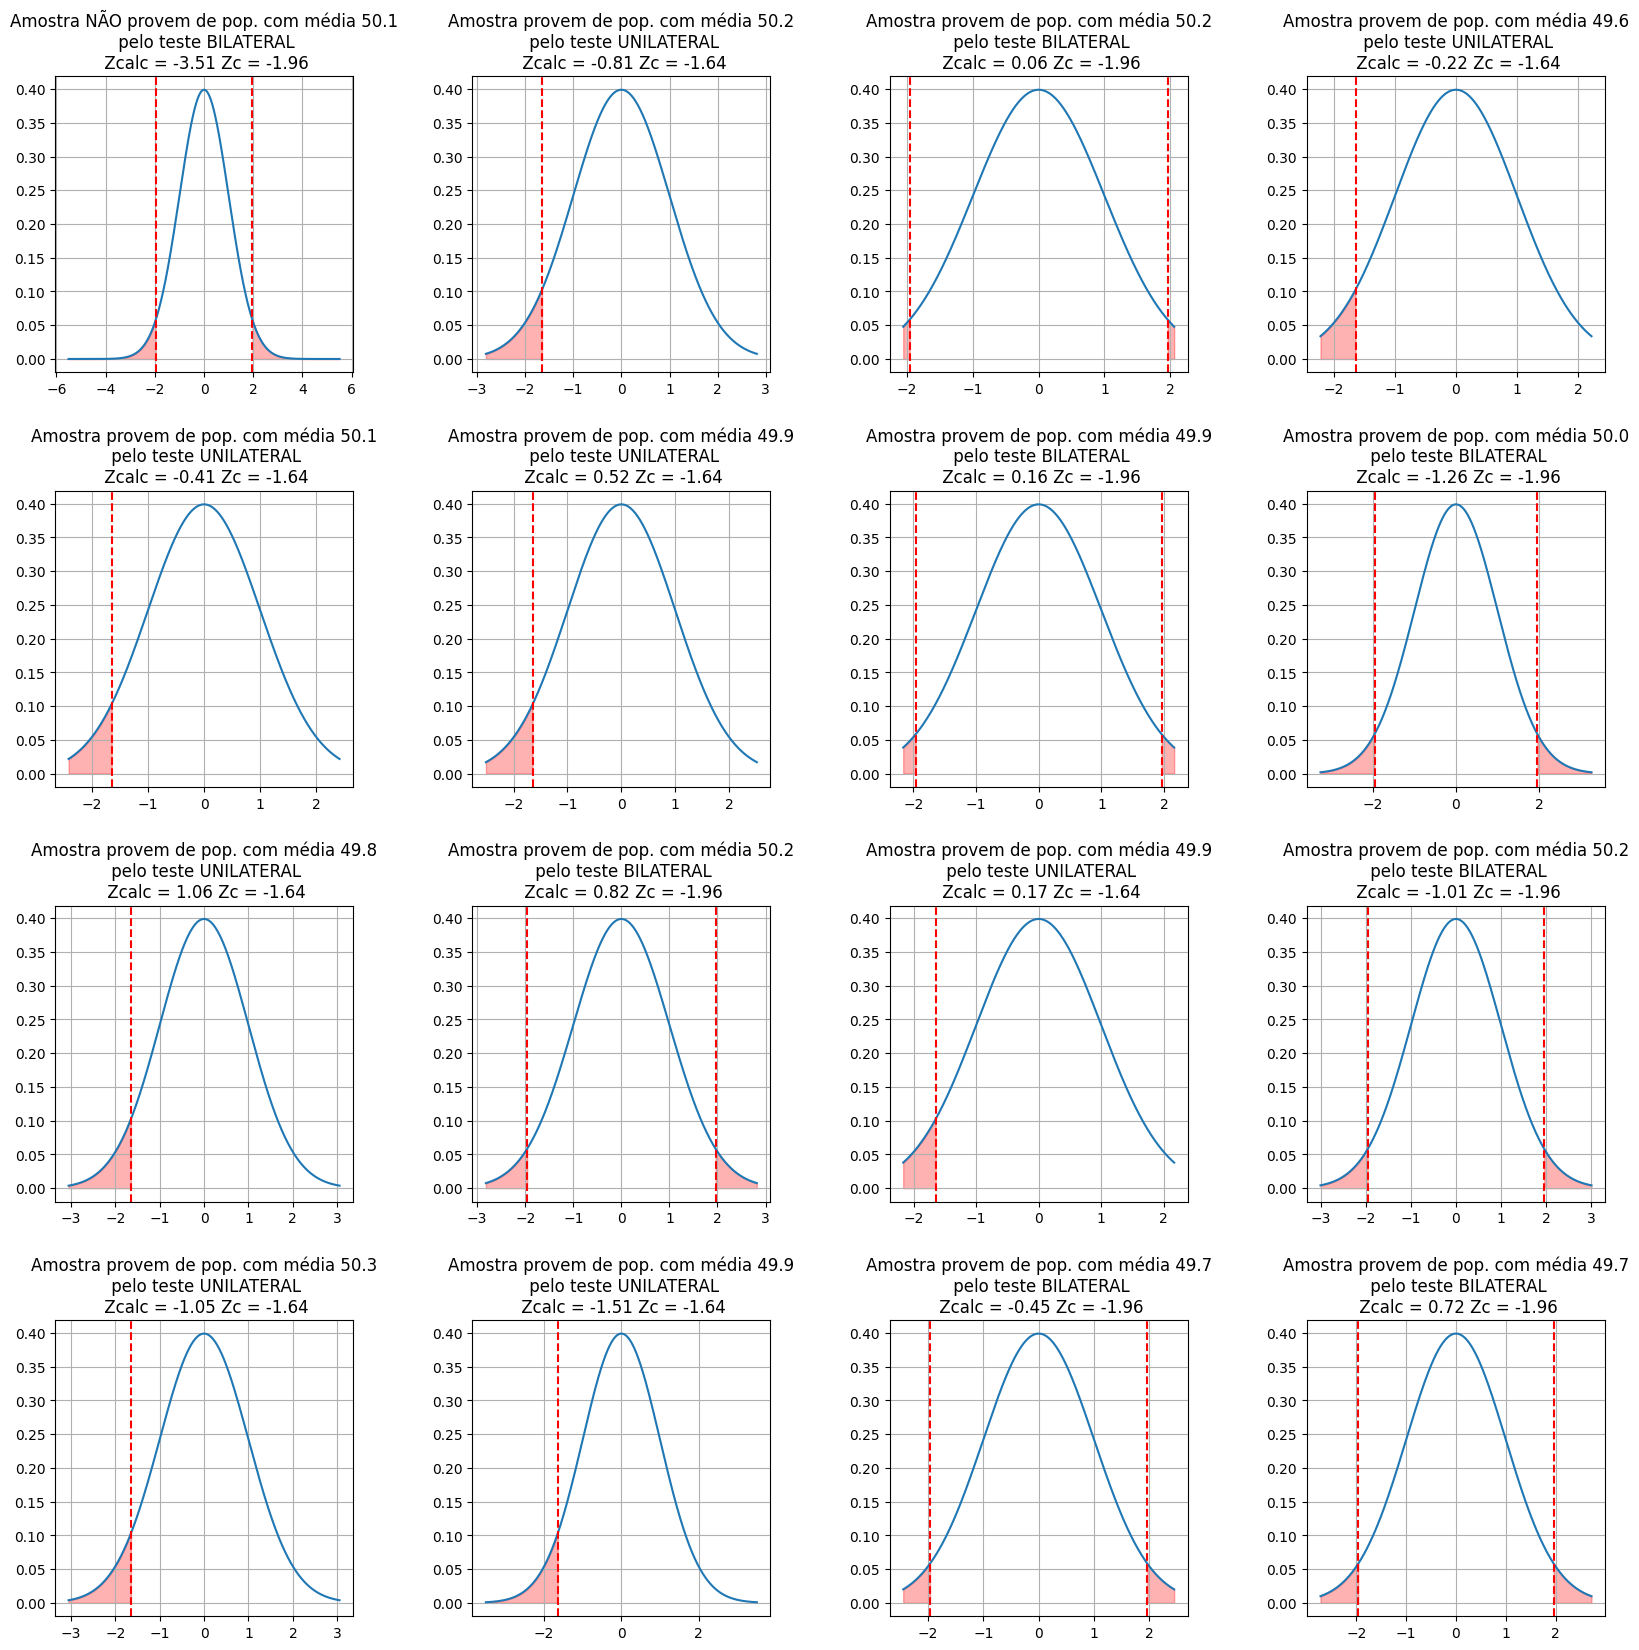

In [165]:
tipo = ['UNILATERAL', 'BILATERAL']
rdf = pd.DataFrame()
is_accepted = []
is_accepted_test = []

fig, axs = plt.subplots(nrows=4, ncols=4, figsize=(20, 20))
plt.subplots_adjust(wspace=0.4, hspace=0.4)

for h in range(4):
  is_accepted_child = []
  is_accepted_test_child = []
  for j in range(4):
    populacao = treat_values(generate_normal_random_values(5000, 0, 100))
    amostra = treat_values(generate_normal_random_values(10, 0, 100))

    media_pop, var_pop, dp_pop, cont_pop = statistics(populacao)
    media_am, var_am, dp_am, cont_am = statistics(amostra)

    teste = random.choice(tipo)
    alpha = 0.05

    Z = (media_am - media_pop) / (dp_pop/(cont_am)**(1/2))
    if teste == 'UNILATERAL':
      ppf = stats.norm.ppf(alpha)
    elif teste == 'BILATERAL':
      ppf = stats.norm.ppf(alpha/2)

    is_accepted_child.append(Zscore(media_pop, cont_am, alpha, media_am, dp_pop, teste))

    if(is_accepted_child[j]):
      axs[h][j].set_title(f'Amostra provem de pop. com média {media_pop:.1f}\n pelo teste {teste}\n Zcalc = {Z:.2f} Zc = {ppf:.2f}')
    else:
      axs[h][j].set_title(f'Amostra NÃO provem de pop. com média {media_pop:.1f}\n pelo teste {teste}\n Zcalc = {Z:.2f} Zc = {ppf:.2f}')

    lim = abs(Z) + 2
    x = np.linspace(-lim, lim, 1000)
    y = stats.norm.pdf(x, 0, 1)

    if teste == 'UNILATERAL':
      axs[h][j].plot(x, y, label=f'Distribuição t ({cont_am-1} graus de liberdade)')
      axs[h][j].axvline(ppf, color='red', linestyle='--', label=f'Valor crítico de t: {ppf:.3f}')
      axs[h][j].fill_between(x, 0, y, where=(x <= ppf), color='red', alpha=0.3)
      axs[h][j].grid(True)

    elif teste == 'BILATERAL':
      axs[h][j].plot(x, y, label=f'Distribuição t ({cont_am-1} graus de liberdade)')
      axs[h][j].axvline(ppf, color='red', linestyle='--', label=f'Valor crítico de t: {ppf:.3f}')
      axs[h][j].axvline(-ppf, color='red', linestyle='--', label=f'Valor crítico de t: {ppf:.3f}')
      axs[h][j].fill_between(x, 0, y, where=(x >= -ppf), color='red', alpha=0.3)
      axs[h][j].fill_between(x, 0, y, where=(x <= ppf), color='red', alpha=0.3)
      axs[h][j].grid(True)

    linha = {}
    linha['N amostral'] = cont_am
    linha['Média populacional'] = media_pop
    linha['Média amostral'] = media_am
    linha['Desvio Padrão populacional'] = dp_pop
    linha['Zcalc'] = Z
    linha['Zcritico'] = ppf
    linha['Teste'] = teste
    linha['Resultado'] = is_accepted_child[j]

    rdf = pd.concat([rdf, pd.DataFrame([linha])])

  is_accepted.append(is_accepted_child)
  is_accepted_test.append(is_accepted_test_child)

plt.show()

In [166]:
rdf

,N amostral,Média populacional,Média amostral,Desvio Padrão populacional,Zcalc,Zcritico,Teste,Resultado
0,10,50.10364,31.96,16.358098,-3.507451,-1.959964,BILATERAL,False
0,10,50.20770,45.95,16.538598,-0.814097,-1.644854,UNILATERAL,True
0,10,50.18298,50.50,16.597927,0.060399,-1.959964,BILATERAL,True
0,10,49.55316,48.38,16.659443,-0.222688,-1.644854,UNILATERAL,True
0,10,50.09738,47.94,16.498419,-0.413508,-1.644854,UNILATERAL,True
0,10,49.88712,52.56,16.411622,0.515025,-1.644854,UNILATERAL,True
0,10,49.93886,50.78,16.533161,0.160884,-1.959964,BILATERAL,True
0,10,49.98460,43.30,16.729454,-1.263554,-1.959964,BILATERAL,True
0,10,49.83584,55.45,16.825115,1.055180,-1.644854,UNILATERAL,True
0,10,50.22560,54.56,16.737140,0.818932,-1.959964,BILATERAL,True


### exemplo do pdf

In [9]:
X = 3.9
n = 42
alpha = 0.05
mu0 = 4.2
sigma = 1
amostra = np.random.normal(loc=mu0, scale=sigma, size=n)

In [10]:
Zscore(X, n, alpha, mu0, sigma, 'UNILATERAL')

False

(array([ 1.,  4.,  4., 10.,  5.,  5.,  5.,  3.,  3.,  2.]),
 array([2.22759953, 2.59376393, 2.95992833, 3.32609273, 3.69225713,
        4.05842154, 4.42458594, 4.79075034, 5.15691474, 5.52307914,
        5.88924354]),
 <BarContainer object of 10 artists>)

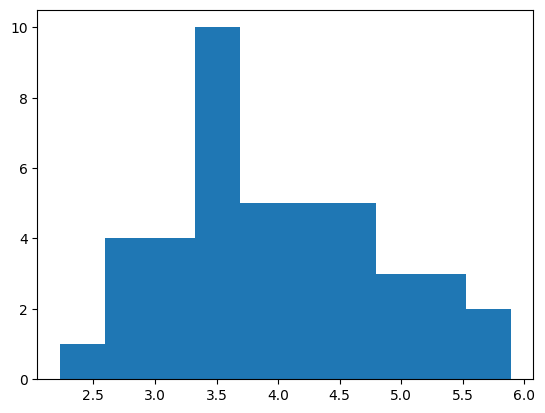

In [11]:
plt.hist(amostra)

In [ ]:
Zscore(X, n, alpha, mu0, sigma, 'BILATERAL')

False

## Teste t-student de Hipótese p/ Média (sigma desconhecido)

In [118]:
def t_student(mu0, n, X, S, alpha, teste):
  Tcalc = (X - mu0) / (S / (n)**(1/2) )

  if teste == 'UNILATERAL':
    Tc = stats.t.ppf(1-alpha, n-1)
    if Tcalc < Tc:
      #print("Não temos evidências para rejeitar H0")
      return True
    else:
      #print("temos evidências para rejeitar H0")
      return False

  elif teste == 'BILATERAL':
    Tc = stats.t.ppf(1-(alpha/2), n-1)
    if Tcalc > -Tc or Tcalc < Tc:
      #print("Não temos evidências para rejeitar H0")
      return True
    else:
      #print("Temos evidências para rejeitar H0")
      return False

In [149]:
def plotagem(Tcalc, Tc, n, teste):
  lim = abs(Tcalc) + 2
  x = np.linspace(-lim, lim, 1000)
  y = stats.t.pdf(x, df=n-1)

  if teste == 'UNILATERAL':
    plt.figure(figsize=(10, 6))
    plt.plot(x, y, label=f'Distribuição t ({n-1} graus de liberdade)')
    plt.axvline(Tc, color='red', linestyle='--', label=f'Valor crítico de t: {Tc:.3f}')
    plt.fill_between(x, 0, y, where=(x >= Tc), color='red', alpha=0.3)
    plt.grid(True)
    plt.show()

  elif teste == 'BILATERAL':
    plt.figure(figsize=(10, 6))
    plt.plot(x, y, label=f'Distribuição t ({n-1} graus de liberdade)')
    plt.axvline(Tc, color='red', linestyle='--', label=f'Valor crítico de t: {Tc:.3f}')
    plt.axvline(-Tc, color='red', linestyle='--', label=f'Valor crítico de t: {Tc:.3f}')
    plt.fill_between(x, 0, y, where=(x >= Tc), color='red', alpha=0.3)
    plt.fill_between(x, 0, y, where=(x <= -Tc), color='red', alpha=0.3)
    plt.grid(True)
    plt.show()

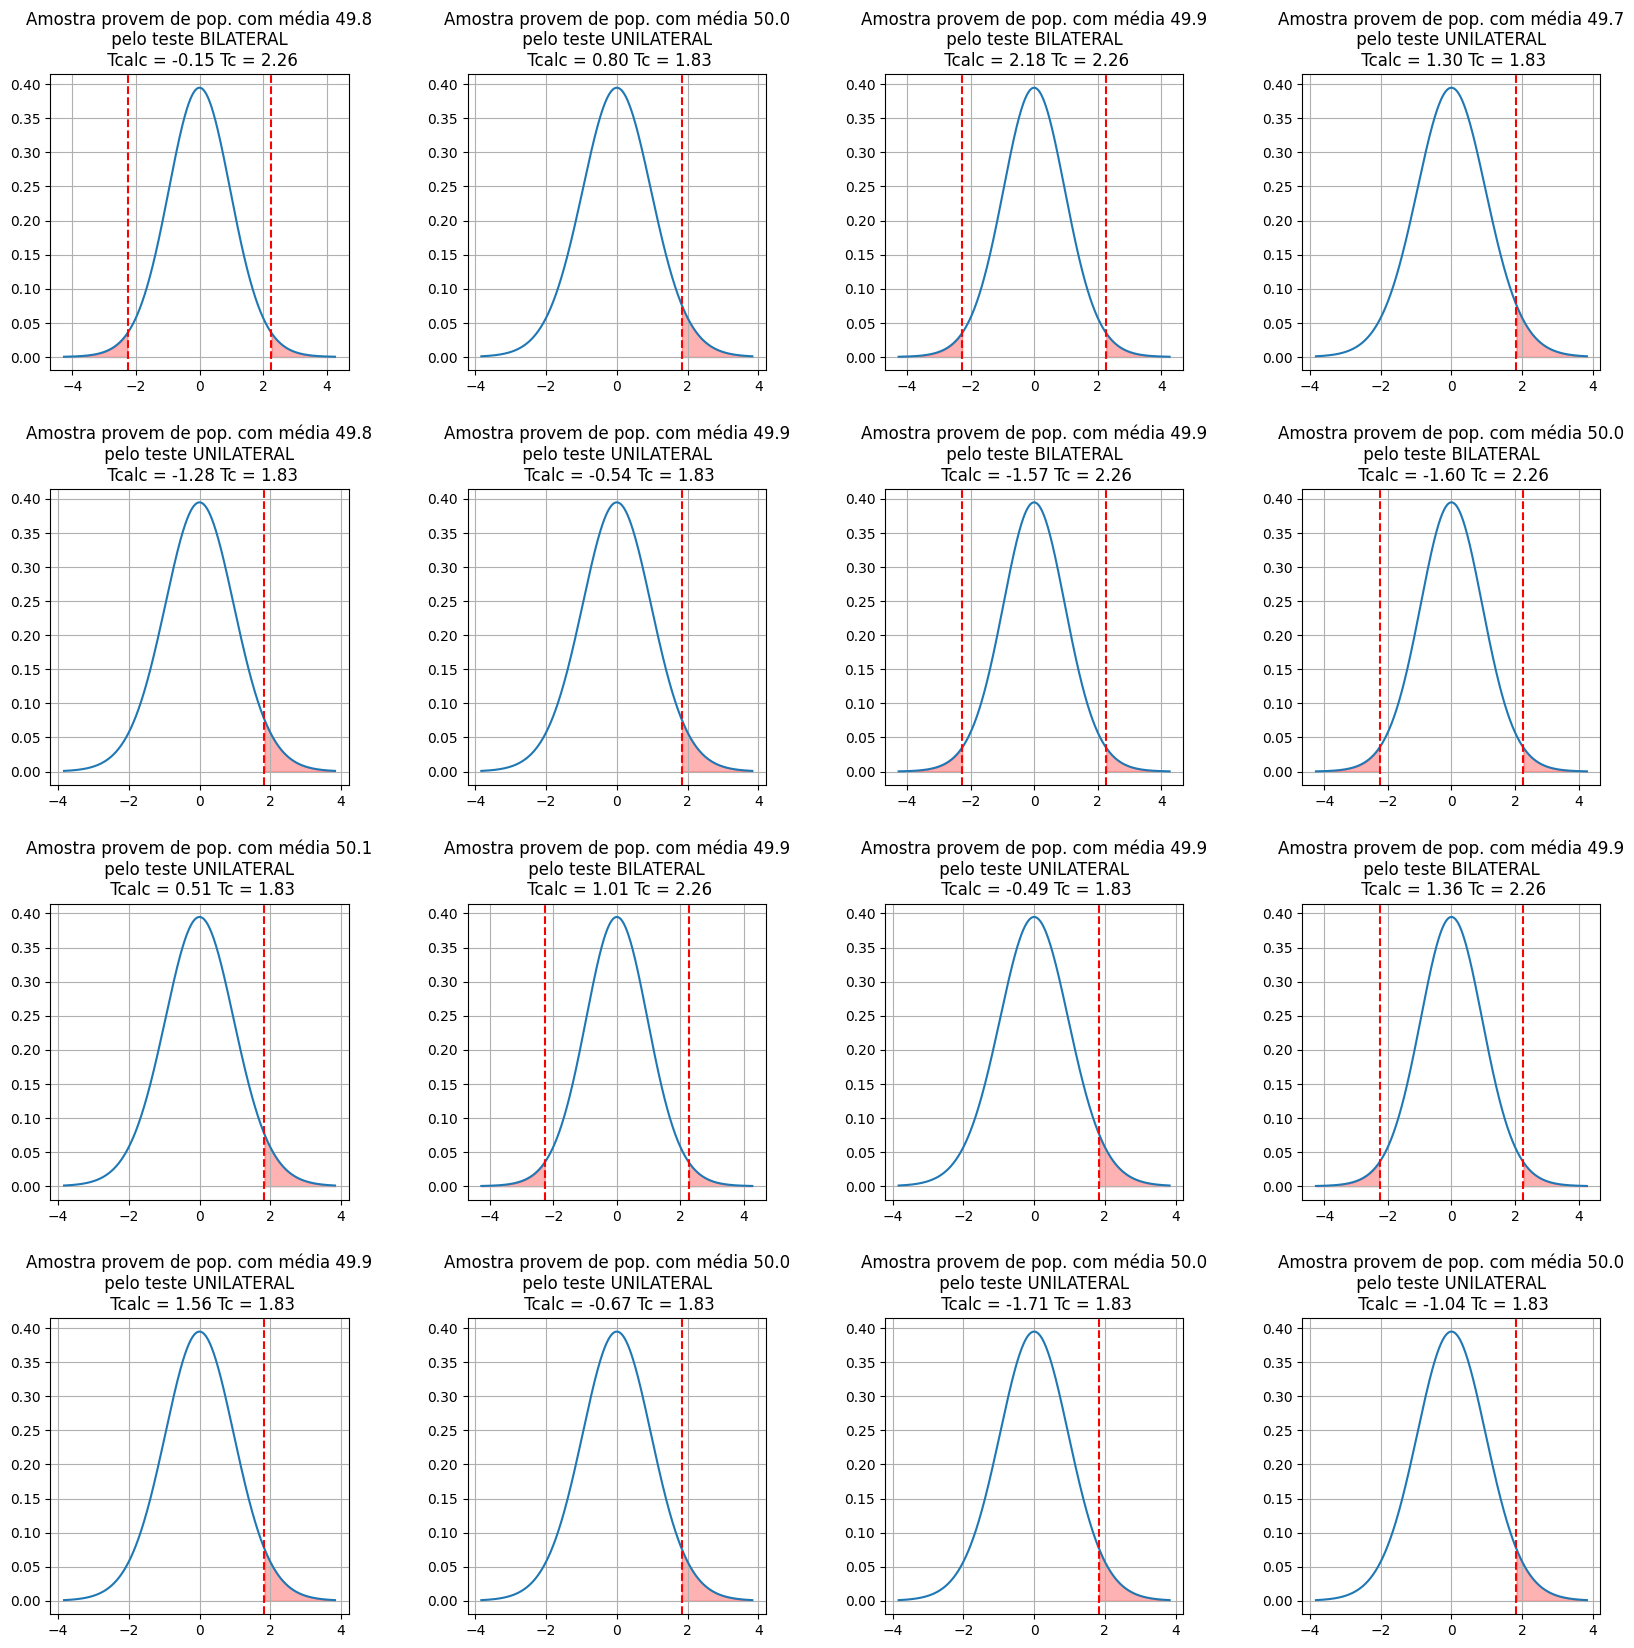

In [156]:
tipo = ['UNILATERAL', 'BILATERAL']
rdf = pd.DataFrame()
is_accepted = []
is_accepted_test = []

fig, axs = plt.subplots(nrows=4, ncols=4, figsize=(20, 20))
plt.subplots_adjust(wspace=0.4, hspace=0.4)

for h in range(4):
  is_accepted_child = []
  is_accepted_test_child = []
  for j in range(4):
    populacao = treat_values(generate_normal_random_values(5000, 0, 100))
    amostra = treat_values(generate_normal_random_values(10, 0, 100))

    media_pop, var_pop, dp_pop, cont_pop = statistics(populacao)
    media_am, var_am, dp_am, cont_am = statistics(amostra)

    teste = random.choice(tipo)
    alpha = 0.050

    Tcalc = (media_am - media_pop) / (dp_am / (cont_am)**(1/2) )
    if teste == 'UNILATERAL':
      Tc = stats.t.ppf(1-alpha, cont_am-1)
    elif teste == 'BILATERAL':
      Tc = stats.t.ppf(1-(alpha/2), cont_am-1)

    is_accepted_child.append(t_student(media_pop, cont_am, media_am, dp_am, alpha, teste))

    if(is_accepted_child[j]):
      axs[h][j].set_title(f'Amostra provem de pop. com média {media_pop:.1f}\n pelo teste {teste} \n Tcalc = {Tcalc:.2f} Tc = {Tc:.2f}')
    else:
      axs[h][j].set_title(f'Amostra NÃO provem de pop. com média {media_pop:.1f}\n pelo teste {teste}\n Tcalc = {Tcalc:.2f} Tc = {Tc:.2f}')

    lim = abs(Tc) + 2
    x = np.linspace(-lim, lim, 1000)
    y = stats.t.pdf(x, df=n-1)

    if teste == 'UNILATERAL':
      axs[h][j].plot(x, y, label=f'Distribuição t ({cont_am-1} graus de liberdade)')
      axs[h][j].axvline(Tc, color='red', linestyle='--', label=f'Valor crítico de t: {Tc:.3f}')
      axs[h][j].fill_between(x, 0, y, where=(x >= Tc), color='red', alpha=0.3)
      axs[h][j].grid(True)

    elif teste == 'BILATERAL':
      axs[h][j].plot(x, y, label=f'Distribuição t ({cont_am-1} graus de liberdade)')
      axs[h][j].axvline(Tc, color='red', linestyle='--', label=f'Valor crítico de t: {Tc:.3f}')
      axs[h][j].axvline(-Tc, color='red', linestyle='--', label=f'Valor crítico de t: {Tc:.3f}')
      axs[h][j].fill_between(x, 0, y, where=(x >= Tc), color='red', alpha=0.3)
      axs[h][j].fill_between(x, 0, y, where=(x <= -Tc), color='red', alpha=0.3)
      axs[h][j].grid(True)

    linha = {}
    linha['N amostral'] = cont_am
    linha['Média populacional'] = media_pop
    linha['Média amostral'] = media_am
    linha['Desvio Padrão amostral'] = dp_am
    linha['Tcalc'] = Tcalc
    linha['Tcritico'] = Tc
    linha['Teste'] = teste
    linha['Resultado'] = is_accepted_child[j]

    rdf = pd.concat([rdf, pd.DataFrame([linha])])

  is_accepted.append(is_accepted_child)
  is_accepted_test.append(is_accepted_test_child)

plt.show()

In [157]:
rdf

,N amostral,Média populacional,Média amostral,Desvio Padrão amostral,Tcalc,Tcritico,Teste,Resultado
0,10,49.83526,49.00,17.872157,-0.147790,2.262157,BILATERAL,True
0,10,49.98282,54.09,16.203299,0.801568,1.833113,UNILATERAL,True
0,10,49.86962,61.01,16.188666,2.176151,2.262157,BILATERAL,True
0,10,49.66036,56.36,16.350609,1.295739,1.833113,UNILATERAL,True
0,10,49.84396,44.10,14.197605,-1.279370,1.833113,UNILATERAL,True
0,10,49.87560,45.45,25.897268,-0.540404,1.833113,UNILATERAL,True
0,10,49.90010,44.61,10.671312,-1.567639,2.262157,BILATERAL,True
0,10,49.95916,42.77,14.195848,-1.601463,2.262157,BILATERAL,True
0,10,50.08982,53.29,19.871208,0.509272,1.833113,UNILATERAL,True
0,10,49.91248,53.72,11.874073,1.014011,2.262157,BILATERAL,True


### exemplo do pdf

In [119]:
# exemplo

mu0 = 18
n = 25
X = 16.808
S = 2.733
alpha = 0.010

In [121]:
t_student(mu0, n, X, S, alpha, 'UNILATERAL')

True